<a href="https://www.kaggle.com/code/haticezbolat/havayolu-m-terisi-memnuniyet-anketi?scriptVersionId=141620588" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This kernel investigates several elements influencing airline passengers' satisfaction. The data set was pretty tidy, free of issues like imbalance or excessive numbers of missing values, etc. As a result, I focused mostly on performing thorough EDA by including several visualizations here. In order to choose the best model, I applied eight models and evaluated their results.

# About Dataset
## Context

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

### Content
**Gender:** Gender of the passengers (Female, Male)

**Customer Type:** The customer type (Loyal customer, disloyal customer)

**Age:** The actual age of the passengers

**Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance:** The flight distance of this journey

**Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

**Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient

**Ease of Online booking:** Satisfaction level of online booking

**Gate location:** Satisfaction level of Gate location

**Food and drink:** Satisfaction level of Food and drink

**Online boarding:** Satisfaction level of online boarding

**Seat comfort:** Satisfaction level of Seat comfort

**Inflight entertainment:** Satisfaction level of inflight entertainment

**On-board service:** Satisfaction level of On-board service

**Leg room service:** Satisfaction level of Leg room service

**Baggage handling:** Satisfaction level of baggage handling

**Check-in service:** Satisfaction level of Check-in service

**Inflight service:** Satisfaction level of inflight service

**Cleanliness:** Satisfaction level of Cleanliness

**Departure Delay in Minutes:** Minutes delayed when departure

**Arrival Delay in Minutes:** Minutes delayed when Arrival

**Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Important packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/havayoluanketi/Q3 - Amadeus Case Study (Business Analyst)  .xlsx


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Get Data

In [3]:
df = pd.read_excel("/kaggle/input/havayoluanketi/Q3 - Amadeus Case Study (Business Analyst)  .xlsx")

In [4]:
# "Type of Travel" sütununda "Business travel" olan ve "Age" sütununda 18 yaş üzerindeki müşterileri filtreleme
df = df[(df['Type of Travel'] == 'Business travel') & (df['Age'] >= 18)]
print(df)

          id  Gender      Customer Type  Age   Type of Travel     Class  \
1       5047    Male  disloyal Customer   25  Business travel  Business   
2     110028  Female     Loyal Customer   26  Business travel  Business   
3      24026  Female     Loyal Customer   25  Business travel  Business   
4     119299    Male     Loyal Customer   61  Business travel  Business   
7      96462  Female     Loyal Customer   52  Business travel  Business   
...      ...     ...                ...  ...              ...       ...   
9994   68459  Female     Loyal Customer   56  Business travel  Business   
9995  124365    Male     Loyal Customer   50  Business travel  Business   
9996   22044    Male     Loyal Customer   38  Business travel  Business   
9997   14057  Female     Loyal Customer   39  Business travel  Business   
9998  113848    Male     Loyal Customer   52  Business travel  Business   

      Flight Distance  Inflight wifi service  \
1                 235                      3   
2  

In [5]:
df.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.000,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.000,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.000,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.000,satisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.000,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.000,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.000,neutral or dissatisfied
10,34991,Female,disloyal Customer,24,Business travel,Eco,1182,4,5,5,4,2,5,2,2,3,3,5,3,5,2,0,0.000,neutral or dissatisfied
12,98628,Male,Loyal Customer,53,Business travel,Eco,834,1,4,4,4,1,1,1,1,1,1,3,4,4,1,28,8.000,neutral or dissatisfied
16,71142,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,3,4,4,4,4,5,3,4,5,4,4,49,51.000,satisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6725 entries, 1 to 9998
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 6725 non-null   int64  
 1   Gender                             6725 non-null   object 
 2   Customer Type                      6725 non-null   object 
 3   Age                                6725 non-null   int64  
 4   Type of Travel                     6725 non-null   object 
 5   Class                              6725 non-null   object 
 6   Flight Distance                    6725 non-null   int64  
 7   Inflight wifi service              6725 non-null   int64  
 8   Departure/Arrival time convenient  6725 non-null   int64  
 9   Ease of Online booking             6725 non-null   int64  
 10  Gate location                      6725 non-null   int64  
 11  Food and drink                     6725 non-null   int64

In [7]:
df = df.drop("id", axis=1)

In [8]:
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.000,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.000,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.000,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.000,satisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.000,satisfied


In [9]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [10]:
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [11]:
df.head(3)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.000,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.000,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.000,0


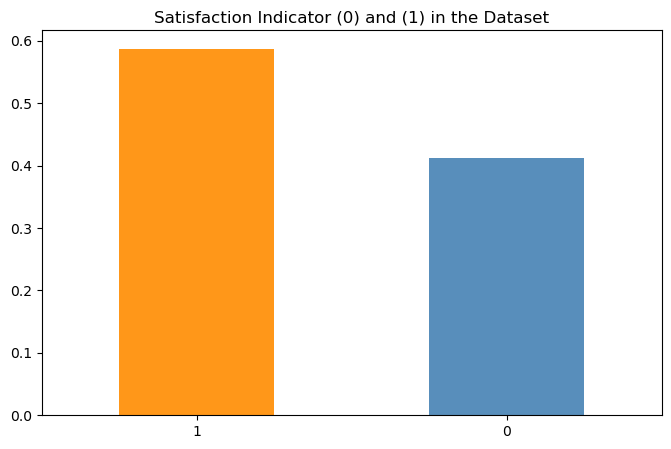

In [12]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

In [13]:
# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,17,0.003
Gender,0,0.000
Seat_comfort,0,0.000
Departure_Delay_in_Minutes,0,0.000
Cleanliness,0,0.000


In [14]:
# Imputing missing value with mean
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean())

In [15]:
# Check the list of categorical variables
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [16]:
# Replace NaN with mode for categorical variables
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Customer_Type'] = df['Customer_Type'].fillna(df['Customer_Type'].mode()[0])
df['Type_of_Travel'] = df['Type_of_Travel'].fillna(df['Type_of_Travel'].mode()[0])
df['Class'] = df['Class'].fillna(df['Class'].mode()[0])

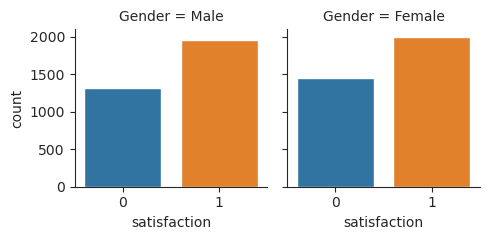

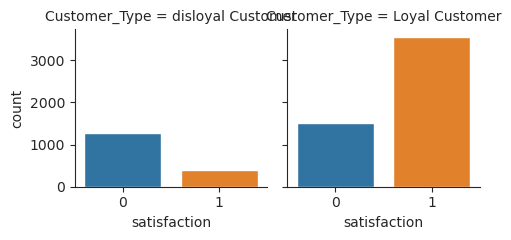

In [17]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot(x="satisfaction", col="Customer_Type", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.0)

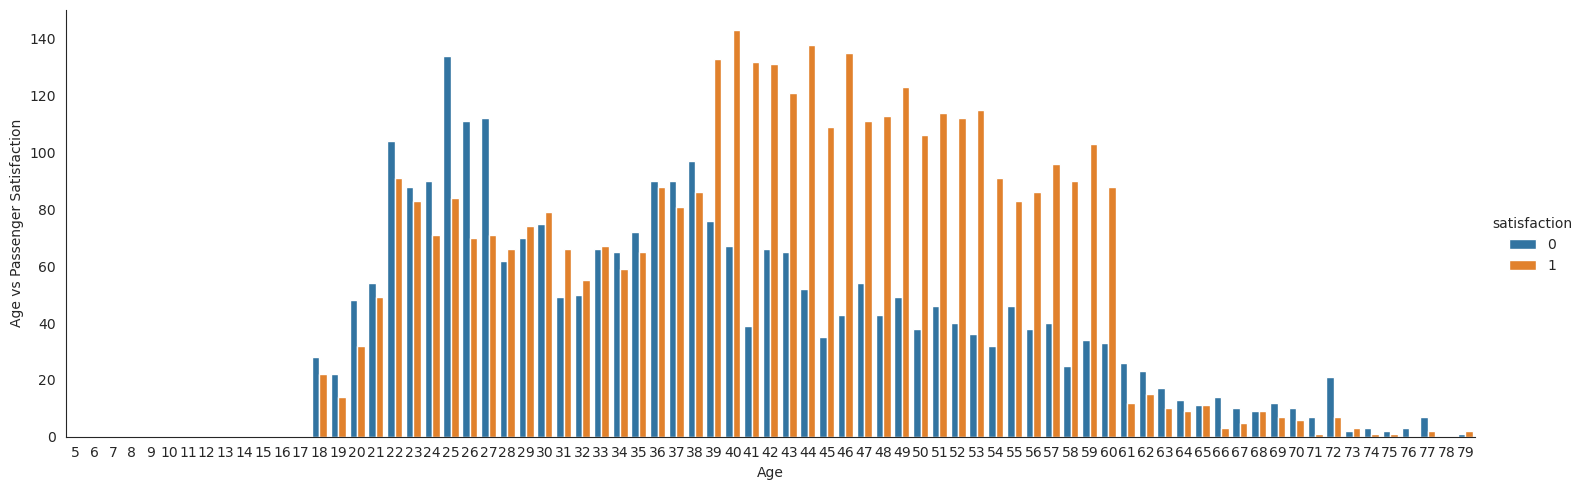

In [18]:
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

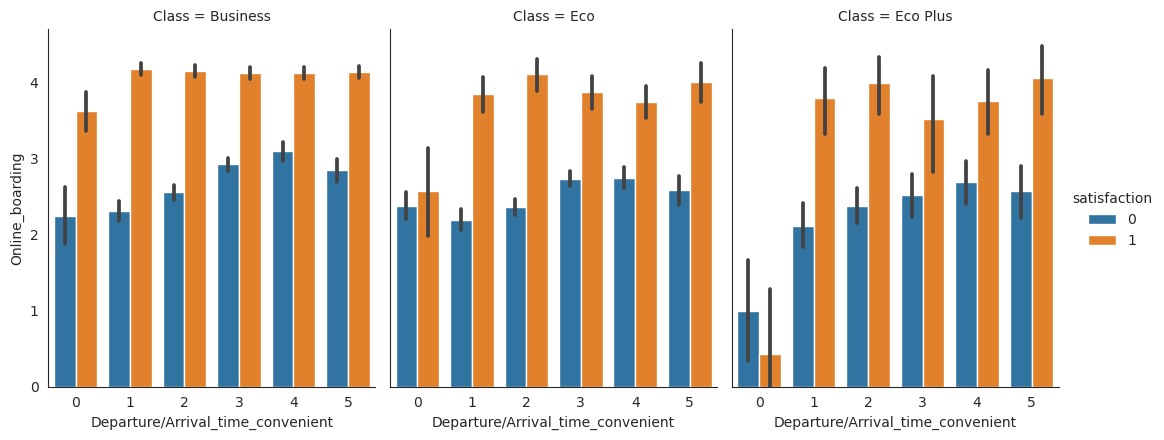

In [19]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)

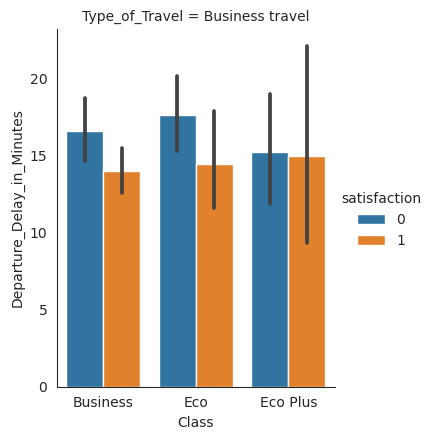

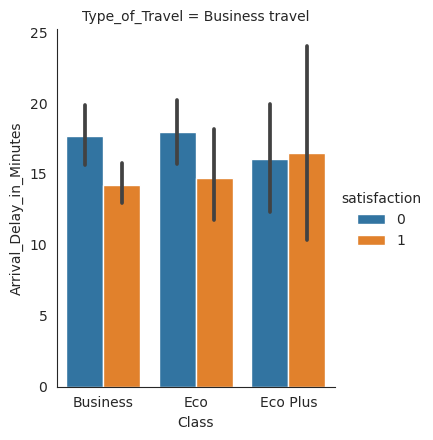

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=df, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=df, kind="bar", height=4.5, aspect=.8)

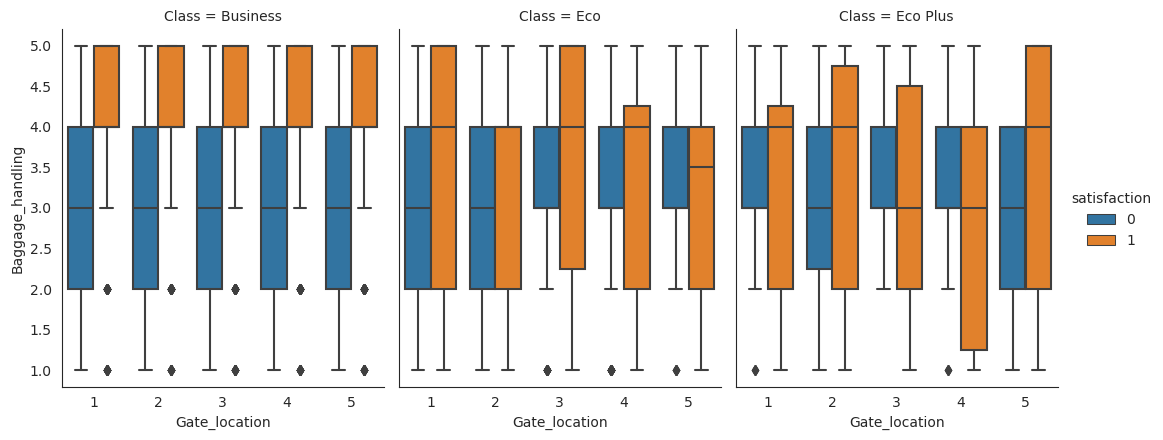

In [21]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=df, kind="box", height=4.5, aspect=.8)

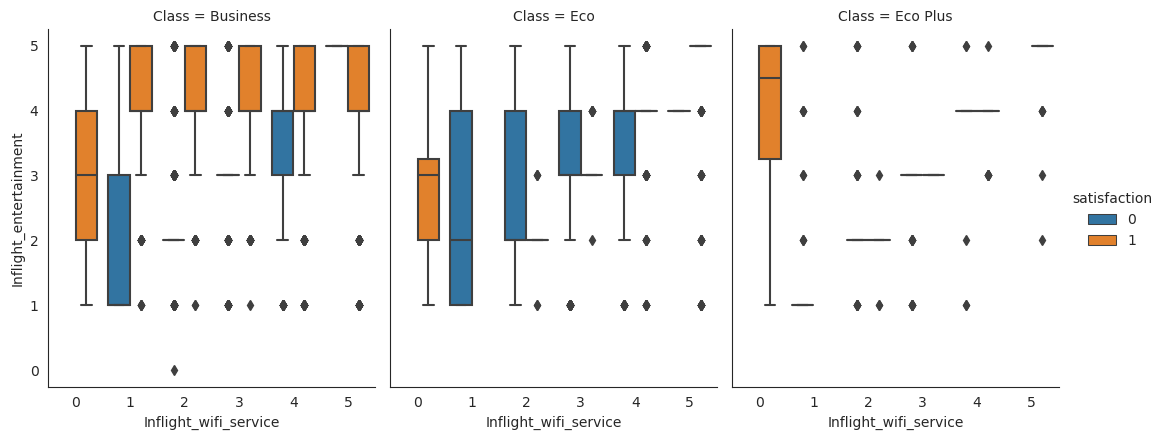

In [22]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=df, kind="box", height=4.5, aspect=.8)

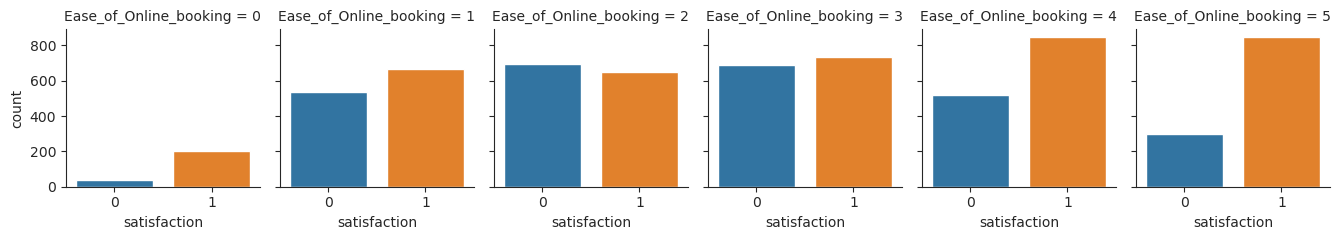

In [23]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x= "satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=df, kind="count", height=2.5, aspect=.9)

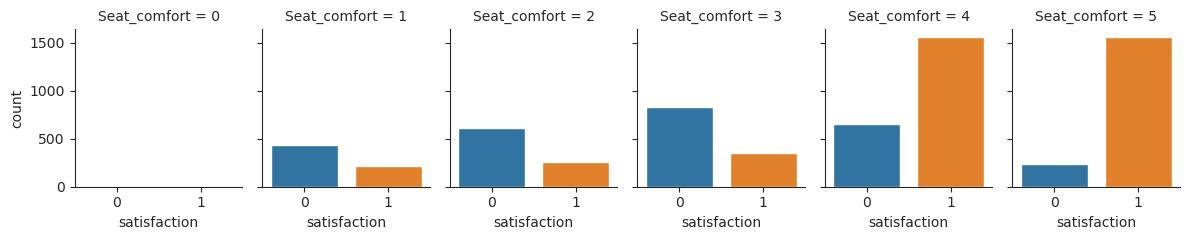

In [24]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Seat_comfort", col_wrap=6, data=df, kind="count", height=2.5, aspect=.8)

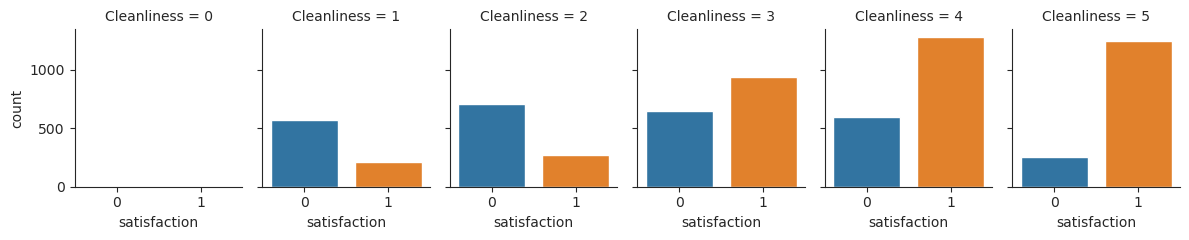

In [25]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x= "satisfaction", col="Cleanliness", col_wrap=6, data=df, kind="count", height=2.5, aspect=.8)

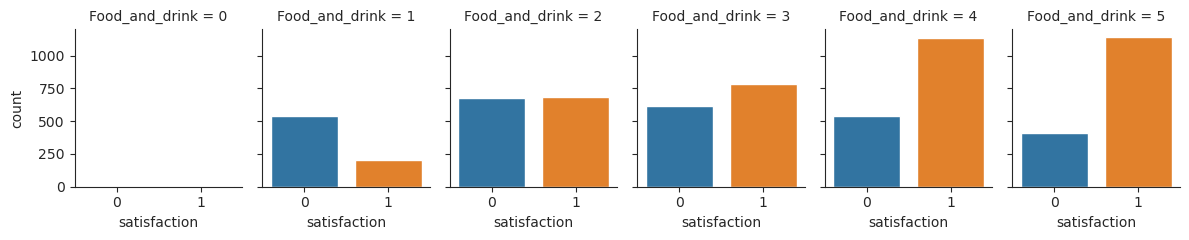

In [26]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x= "satisfaction", col="Food_and_drink", col_wrap=6, data=df, kind="count", height=2.5, aspect=.8)


<Axes: xlabel='Leg_room_service', ylabel='satisfaction'>

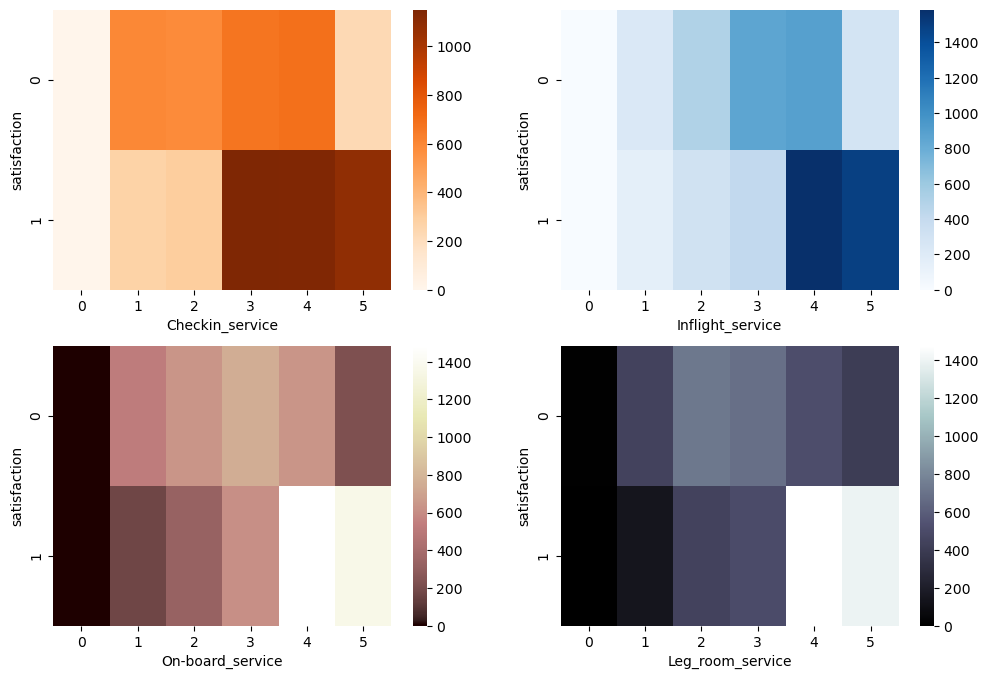

In [27]:
import matplotlib.pyplot as plt 
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(df['satisfaction'], df['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(df['satisfaction'], df['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(df['satisfaction'], df['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(df['satisfaction'], df['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

In [28]:
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                        1.000
Customer_Type                 0.000
Age                          20.000
Type_of_Travel                0.000
Class                         1.000
                              ...  
Inflight_service              2.000
Cleanliness                   2.000
Departure_Delay_in_Minutes   13.000
Arrival_Delay_in_Minutes     13.000
satisfaction                  1.000
Length: 23, dtype: float64


In [30]:
# Removing outliers from dataset
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape


(3644, 23)

<Axes: >

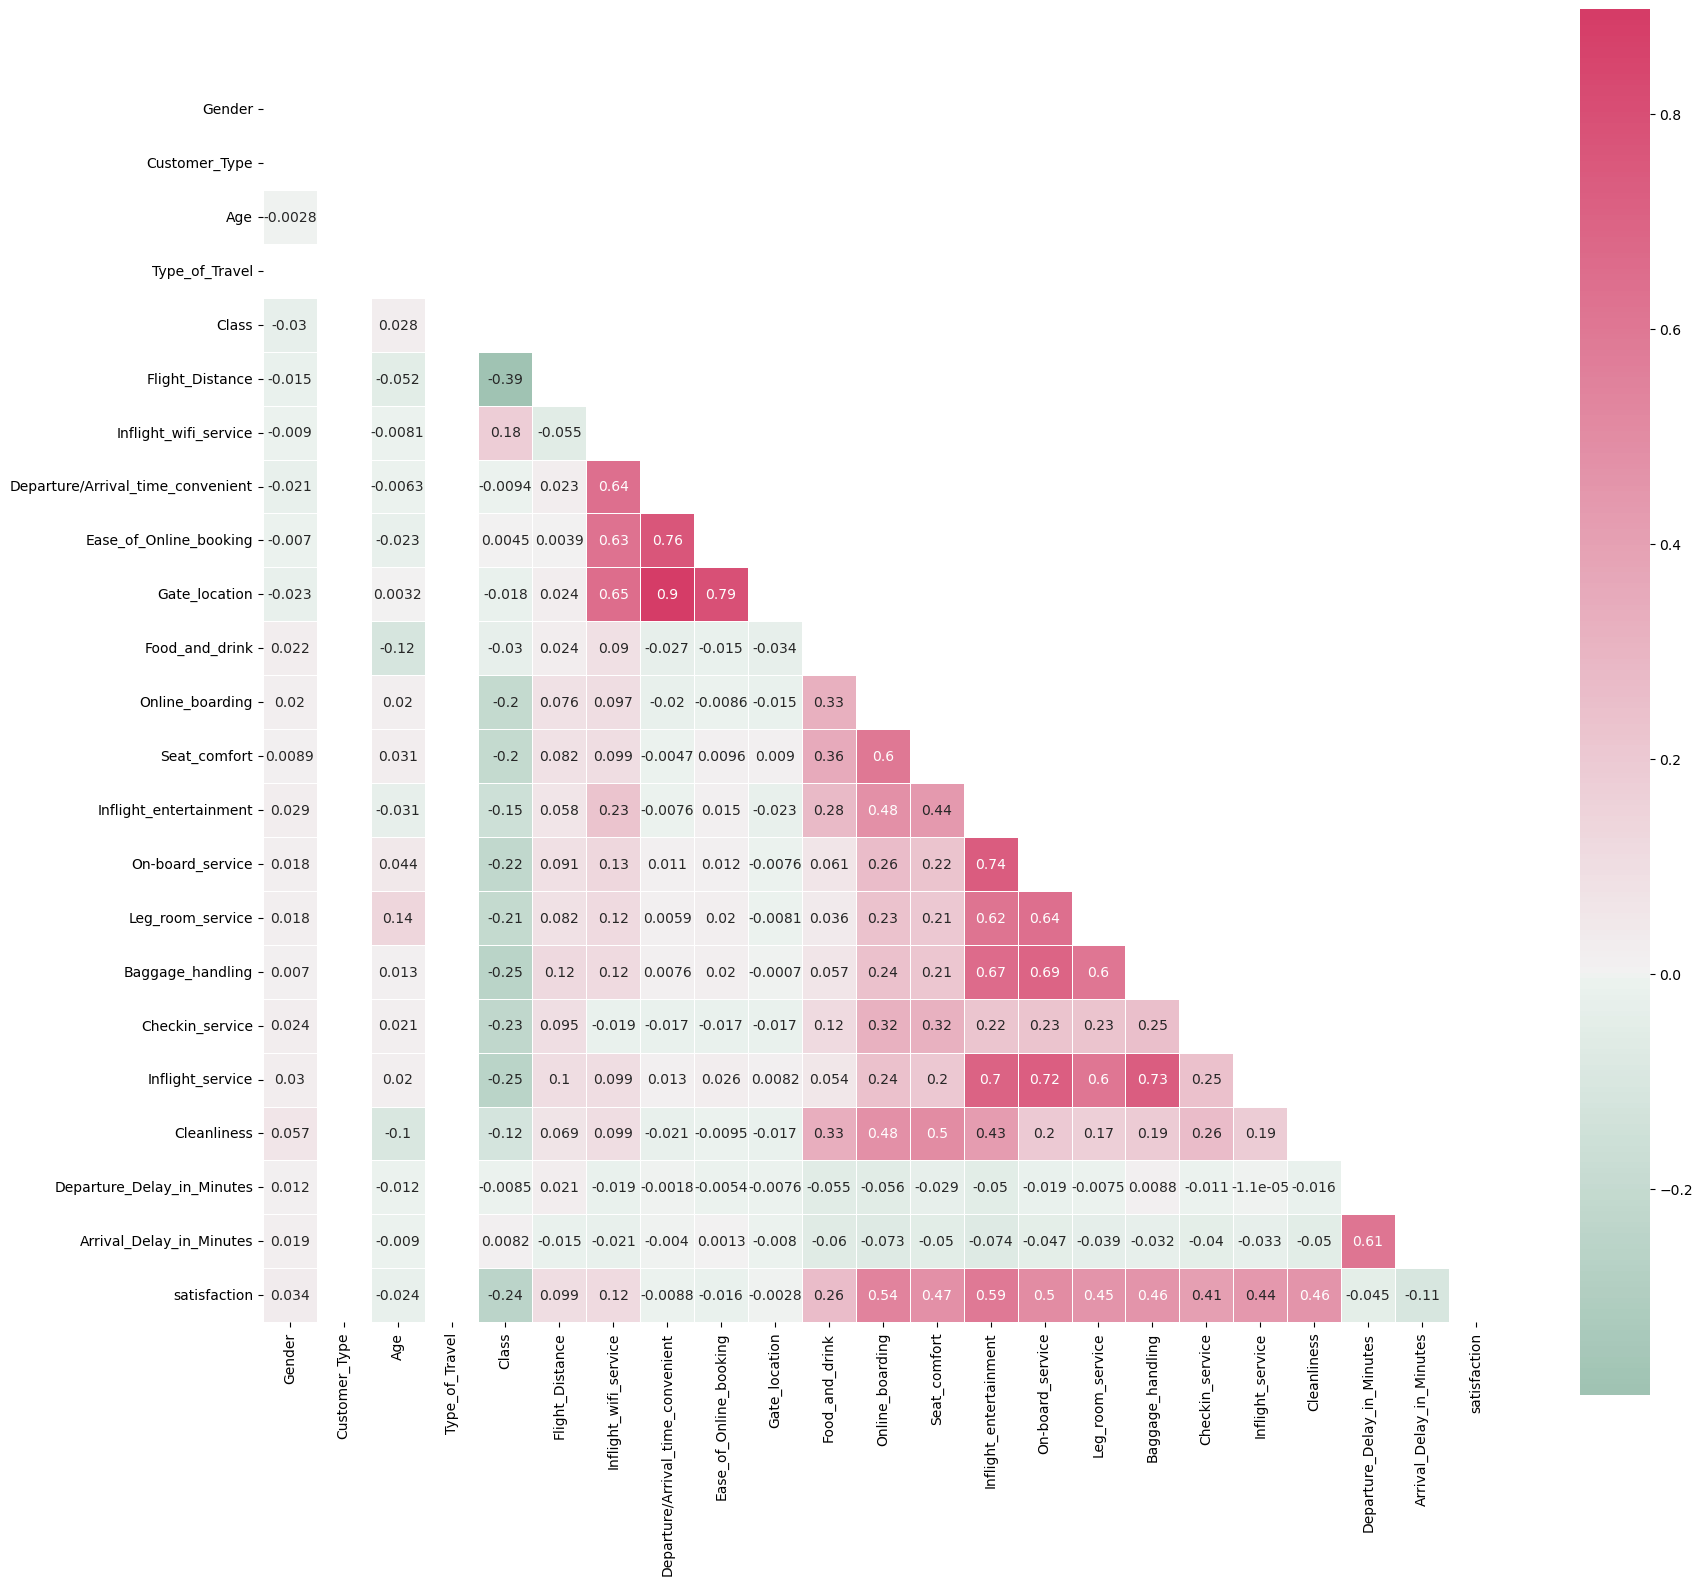

In [31]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [32]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)
#modified_data = pd.DataFrame(r_scaler.transform(df), index=df['id'], columns=df.columns)
modified_data = pd.DataFrame(r_scaler.transform(df), columns=df.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0.000,0.000,0.129,0.000,0.000,0.264,0.400,0.400,0.400,0.250,1.000,1.000,1.000,1.000,0.667,0.600,0.750,0.750,0.750,1.000,0.000,0.000,1.000
1,0.000,0.000,0.113,0.000,0.000,0.126,0.400,1.000,1.000,1.000,0.250,0.000,0.250,0.250,0.000,1.000,0.500,0.000,0.750,0.250,0.344,0.281,0.000
2,1.000,0.000,0.694,0.000,0.000,0.043,0.600,0.600,0.600,0.500,0.750,1.000,1.000,0.500,0.333,0.800,0.750,0.500,0.500,0.500,0.000,0.000,1.000
3,0.000,0.000,0.548,0.000,0.000,0.476,0.800,0.600,0.800,0.750,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.750,1.000,0.750,0.125,0.000,1.000
4,1.000,0.000,0.371,0.000,0.000,0.485,0.800,0.800,0.400,0.750,0.750,0.667,0.750,1.000,1.000,1.000,1.000,0.500,1.000,1.000,0.000,0.312,1.000


In [33]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Class', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness'],
      dtype='object')


In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']
[0.00567031 0.         0.03266193 0.         0.01532608 0.03227013
 0.07818859 0.01508707 0.0205903  0.01600387 0.0212461  0.11216524
 0.12523064 0.12356905 0.05252127 0.0501547  0.0798974  0.07107271
 0.05774901 0.06368749 0.01193783 0.01497027]


In [35]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0804 ± 0.0088,Seat_comfort
0.0743 ± 0.0034,Online_boarding
0.0521 ± 0.0029,Checkin_service
0.0516 ± 0.0053,Baggage_handling
0.0507 ± 0.0026,Inflight_wifi_service
0.0398 ± 0.0048,Inflight_service
0.0367 ± 0.0039,Cleanliness
0.0190 ± 0.0013,Inflight_entertainment
0.0070 ± 0.0023,On-board_service
0.0060 ± 0.0011,Leg_room_service


In [36]:
# Modelling

y = df["satisfaction"]
X = df.drop("satisfaction", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.96
Recall: 0.962
Precision: 0.98
F1: 0.97
Auc: 0.95


    Value                     Feature
12  0.143                Seat_comfort
13  0.116      Inflight_entertainment
11  0.109             Online_boarding
16  0.077            Baggage_handling
6   0.073       Inflight_wifi_service
..    ...                         ...
9   0.014               Gate_location
20  0.011  Departure_Delay_in_Minutes
0   0.005                      Gender
1   0.000               Customer_Type
3   0.000              Type_of_Travel

[22 rows x 2 columns]


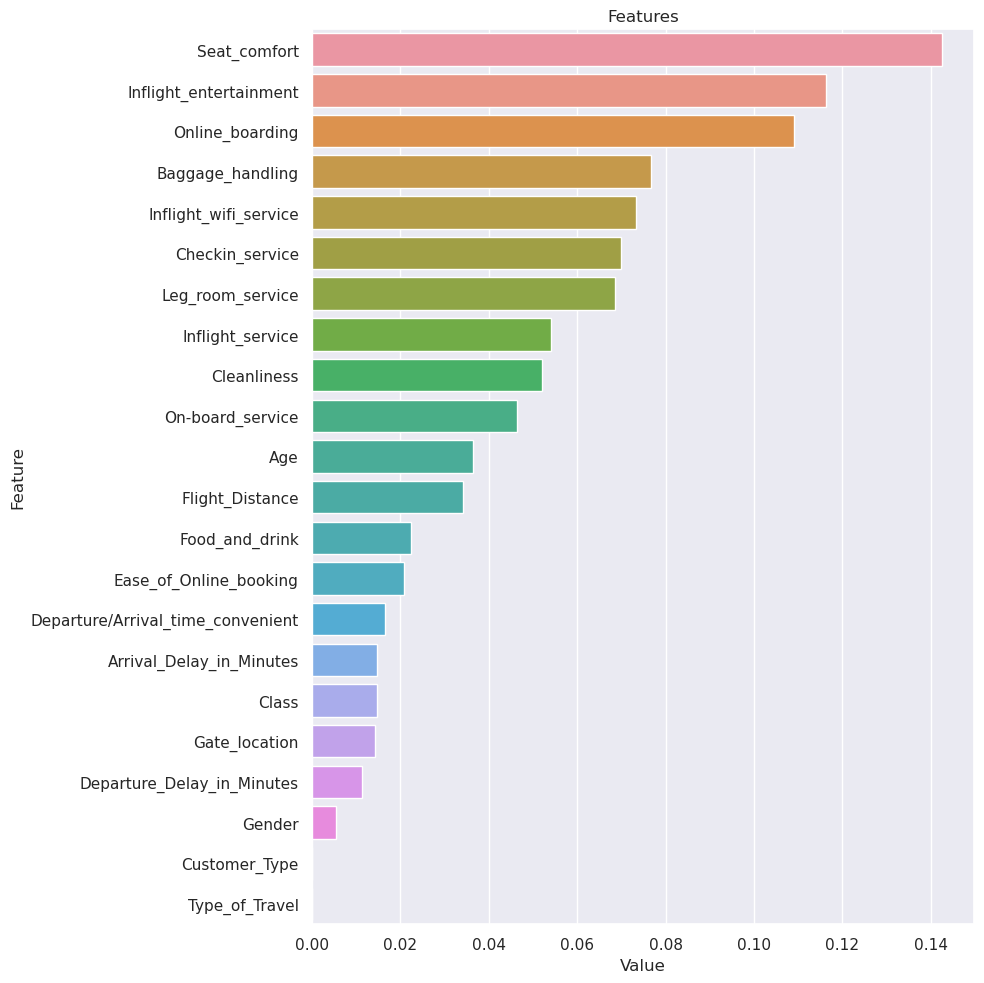

In [37]:
# FEATURE IMPORTANCE

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)


In [38]:
y = df["satisfaction"]
X = df.drop("satisfaction", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [39]:
models = {}
models['Logistic Regression'] = LogisticRegression(max_iter=1000) 
models['Decision Trees'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbor'] = KNeighborsClassifier()

accuracy, precision, recall = {}, {}, {}

In [40]:
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [41]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.896,0.934,0.932
Decision Trees,0.932,0.960,0.953
Random Forest,0.954,0.981,0.961
Naive Bayes,0.896,0.905,0.959
K-Nearest Neighbor,0.773,0.950,0.798


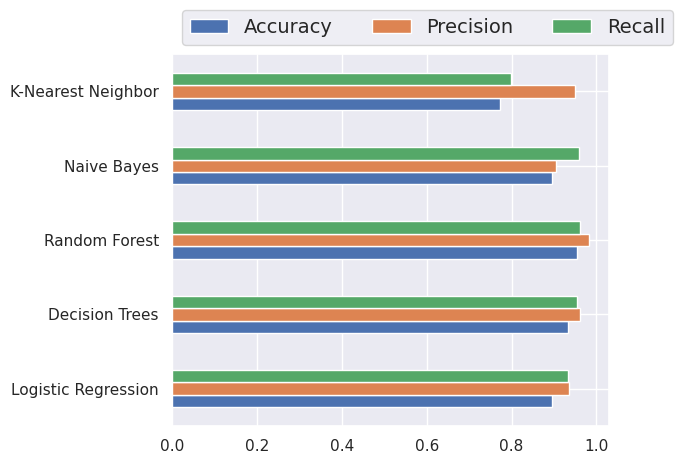

In [42]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

<Figure size 1000x800 with 0 Axes>

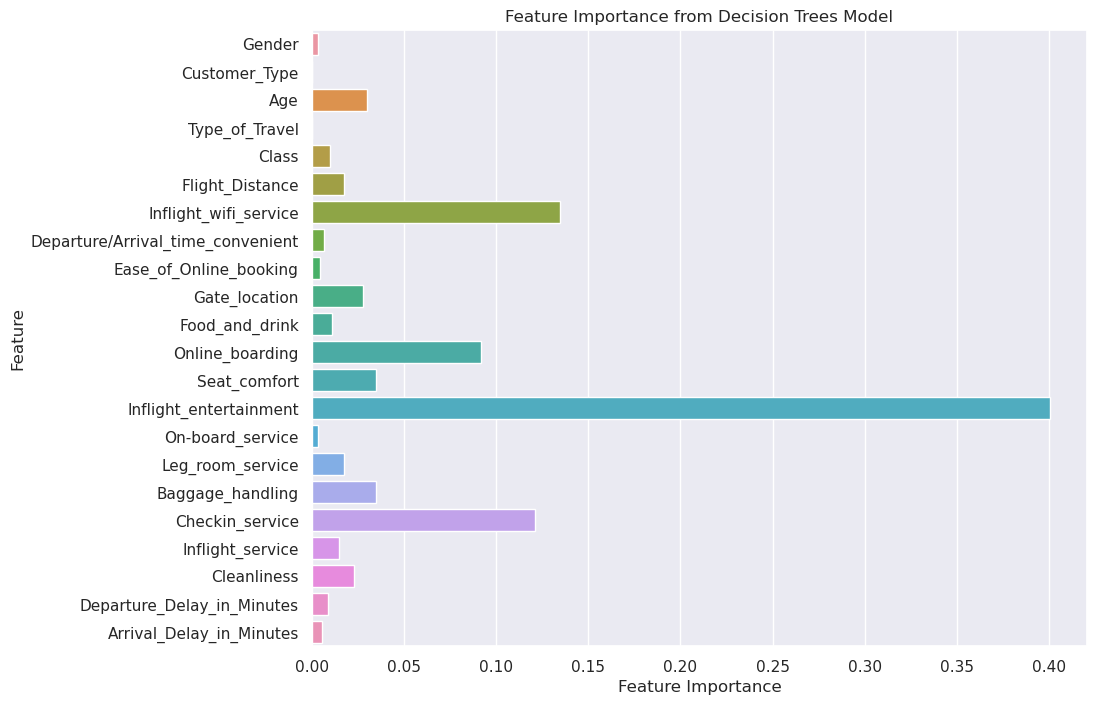

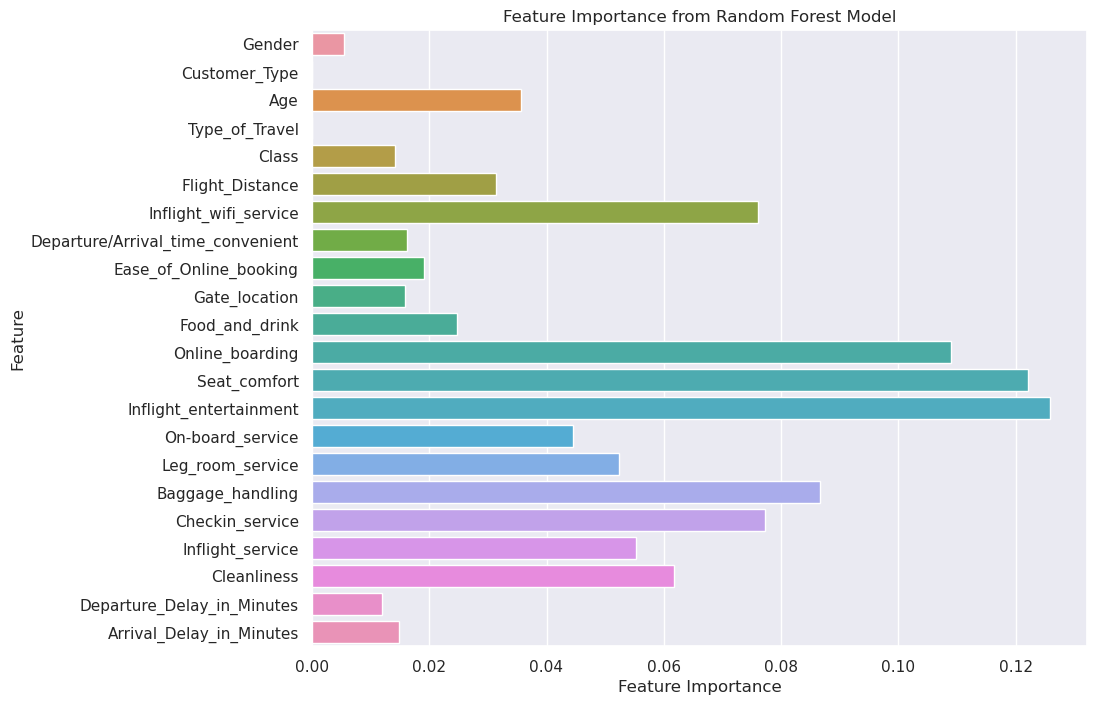

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [43]:
models_except_dl = {key: value for key, value in models.items()}

for key, model in models_except_dl.items():
    plt.figure(figsize=(10, 8))
    if key == 'Random Forest':
        feature_importance = model.feature_importances_
        sns.barplot(x=feature_importance, y=X_train.columns)
        plt.title(f'Feature Importance from {key} Model')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()
    elif key == 'Decision Trees':
        feature_importance = model.feature_importances_
        sns.barplot(x=feature_importance, y=X_train.columns)
        plt.title(f'Feature Importance from {key} Model')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()